In [1]:
import pandas as pd
df = pd.read_excel("AdidasSalesdata.xlsx")

In [3]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [7]:
df.shape

(9648, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [13]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Gender Type', 'Product Category', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [15]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [31]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [33]:
df.head()

,retailer,retailer_id,invoice_date,region,state,city,gender_type,product_category,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

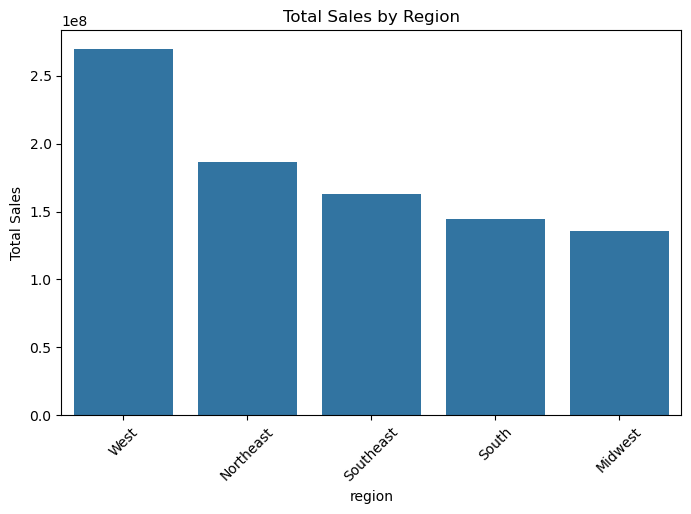

In [39]:
region_sales = df.groupby('region')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

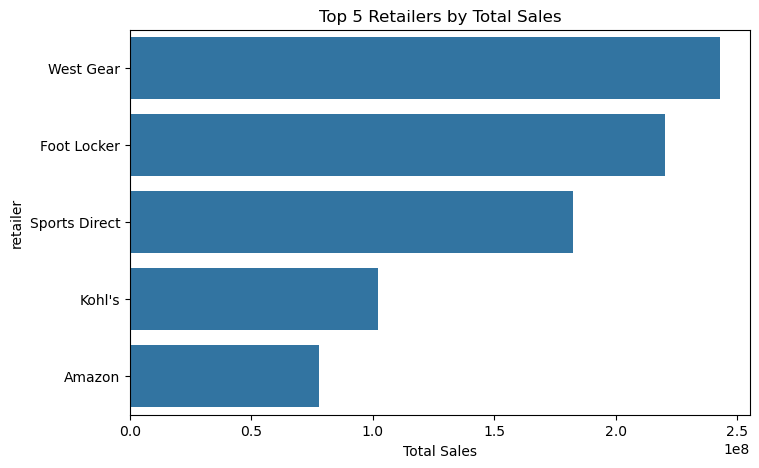

In [43]:
retailer_sales = df.groupby('retailer')['total_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=retailer_sales.values, y=retailer_sales.index)
plt.title("Top 5 Retailers by Total Sales")
plt.xlabel("Total Sales")
plt.show()

In [45]:
city_avg_sales = df.groupby('city')['total_sales'].mean().sort_values(ascending=False).head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8236\2168387491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_sales.values, y=city_avg_sales.index, palette='viridis')


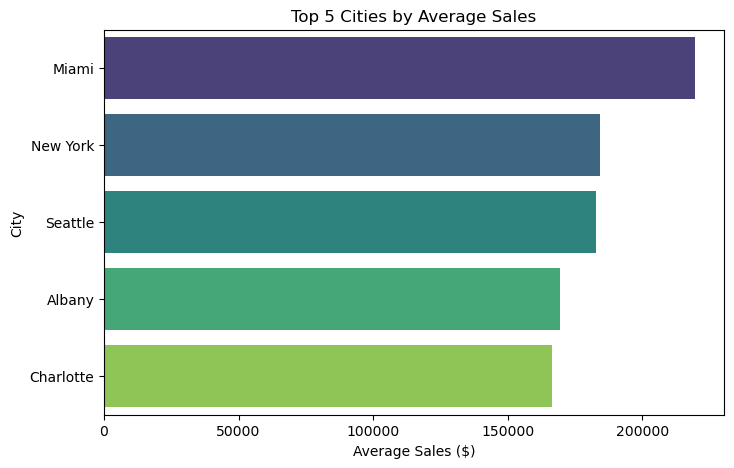

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x=city_avg_sales.values, y=city_avg_sales.index, palette='viridis')
plt.title("Top 5 Cities by Average Sales")
plt.xlabel("Average Sales ($)")
plt.ylabel("City")
plt.show()

In [49]:
output_path = "AdidasSalesdata_cleaned.csv"   
df.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset successfully saved as '{output_path}'")

✅ Cleaned dataset successfully saved as 'AdidasSalesdata_cleaned.csv'


In [55]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import urllib.parse 
# Load cleaned dataset
df = pd.read_csv("AdidasSalesdata_cleaned.csv")

# MySQL connection details
user = "root"             
password = "Rushi@123"   
host = "localhost"
database = "adidas_sales"

# Encode password (handles special characters)
password_encoded = urllib.parse.quote_plus(password)

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password_encoded}@{host}/{database}")

# Upload DataFrame to MySQL
df.to_sql('adidas_data', con=engine, if_exists='replace', index=False)

print("✅ Data successfully uploaded to MySQL!")

✅ Data successfully uploaded to MySQL!
